In [125]:
import numpy as np
import pandas as pd
import ast
import os
from pathlib import Path
from modeling_parameters.config import (
    PRIM_PARTICLE, 
    THETA,
    COORDINATES_PATH,
    RECONSTRUCTION_GEANT_OUTPUT_DIR,
    MATPLOTLIBRC_PATH,
    CENTRAL_STATIONS,
)


import matplotlib as mpl
mpl.rc_file(MATPLOTLIBRC_PATH)
import matplotlib.pyplot as plt
import seaborn as sns

from modeling_parameters.reconstruction.geant.functions import(
     compute_r,
     rho_model,
)

from functions import (
    plot_two_distributions_by_name,
    plot_single_distribution_by_name,
    plot_single_distribution_Ne,
    plot_two_distributions_Ne
)

In [126]:
coordinates_df = pd.read_csv(COORDINATES_PATH)

X_det = np.array(coordinates_df['X'])
Y_det = np.array(coordinates_df['Y'])
Z_det = np.array(coordinates_df['Z'])

In [184]:
folder_path = Path(RECONSTRUCTION_GEANT_OUTPUT_DIR)
files = sorted(f for f in folder_path.iterdir() if f.is_file())

def get_file_by_index(index):
    if 0 <= index < len(files):
        return files[index]
    else:
        return None  

index = 3
file = get_file_by_index(index)

if file is not None:
    print(f"Файл с индексом {index}: {file}")
else:
    print(f"Нет файла с индексом {index}")
file_name = file .stem 
E = int(file_name.split('p')[1][:2]) 

Файл с индексом 3: d:\github\repositories\sdf\modeling_parameters\reconstruction\geant\output\p30\p1730_reconstruction.csv


In [185]:
file

WindowsPath('d:/github/repositories/sdf/modeling_parameters/reconstruction/geant/output/p30/p1730_reconstruction.csv')

In [186]:
df = pd.read_csv(file)
df.head(1)

,theta,phi,X0,Y0,Ne,s,r,rho,mask,worked_clusters,worked_stations,X0_opt,Y0_opt,Ne_opt,s_opt,loss
0,30.0,53.163406,21.254372,60.10446,4734297.0,1.375637,"[67.61159140527879, 75.23252094436174, 83.2199...","[83.62303129056603, 61.00003893782452, 46.4732...","[True, True, True, True, True, True, True, Tru...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16.939535,55.382842,4.404833e+06,1.114597,0.021445


In [187]:
df['r'] = df['r'].apply(ast.literal_eval)
df['rho'] = df['rho'].apply(ast.literal_eval)
df['mask'] = df['mask'].apply(ast.literal_eval)
df['worked_clusters'] = df['worked_clusters'].apply(ast.literal_eval)
df['worked_stations'] = df['worked_stations'].apply(ast.literal_eval)

In [188]:
theta = np.array(df['theta'])
phi = np.array(df['phi'])

In [189]:
X = np.array(df['X0'])
X_opt = np.array(df['X0_opt'])

Y = np.array(df['Y0'])
Y_opt = np.array(df['Y0_opt'])

Ne = np.array(df['Ne'])
Ne_opt = np.array(df['Ne_opt'])

s = np.array(df['s'])
s_opt = np.array(df['s_opt'])

rho = np.array(df['rho'])
loss = np.array(df['loss'])

In [190]:
r = []
r_opt = []

for i in range(len(X)):
    r.append(compute_r(X[i], Y[i], -18, theta[i], phi[i], X_det, Y_det, Z_det))
    r_opt.append(compute_r(X_opt[i], Y_opt[i], -18, theta[i], phi[i], X_det, Y_det, Z_det))

r = np.array(r)
r_opt = np.array(r_opt)


In [191]:
def is_top4_central(row):
    worked_stations = row['worked_stations']
    rho = row['rho']
    stations_rho = list(zip(worked_stations, rho))
    stations_rho_sorted = sorted(stations_rho, key=lambda x: x[1], reverse=True)
    
    top4_stations = [station for station, _ in stations_rho_sorted[:4]]
    return all(station in CENTRAL_STATIONS for station in top4_stations)

top4c_df = df[df.apply(is_top4_central, axis=1)]

In [192]:
top4c_mask = df.apply(is_top4_central, axis=1)

t4c_X = np.array(top4c_df['X0'])
t4c_X_opt = np.array(top4c_df['X0_opt'])

t4c_Y = np.array(top4c_df['Y0'])
t4c_Y_opt = np.array(top4c_df['Y0_opt'])

t4c_Ne = np.array(top4c_df['Ne'])
t4c_Ne_opt = np.array(top4c_df['Ne_opt'])

t4c_s = np.array(top4c_df['s'])
t4c_s_opt = np.array(top4c_df['s_opt'])

t4c_r = r[top4c_mask]
t4c_r_opt = r_opt[top4c_mask]

t4c_rho = np.array(top4c_df['rho'])
t4c_loss = np.array(top4c_df['loss'])

In [193]:
r = np.concatenate(r)
r_opt = np.concatenate(r_opt)

t4c_r = np.concatenate(t4c_r)
t4c_r_opt = np.concatenate(t4c_r_opt)

In [194]:
arrays = {
    'X': X,
    'X_opt': X_opt,
    'Y': Y,
    'Y_opt': Y_opt,
    'Ne': Ne,
    'Ne_opt': Ne_opt,
    's': s,
    's_opt': s_opt,
    'r': r,
    'r_opt': r_opt,
    
    'rho': rho,
    'loss': loss,
    
    't4c_X': t4c_X,
    't4c_X_opt': t4c_X_opt,
    't4c_Y': t4c_Y,
    't4c_Y_opt': t4c_Y_opt,
    't4c_Ne': t4c_Ne,
    't4c_Ne_opt': t4c_Ne_opt,
    't4c_s': t4c_s,
    't4c_s_opt': t4c_s_opt,
    't4c_r': t4c_r,
    't4c_r_opt': t4c_r_opt,
    
    't4c_rho': t4c_rho,
    't4c_loss': t4c_loss,
}

In [257]:
who = 'r'
limit = 25
bin_width = 1
save = False

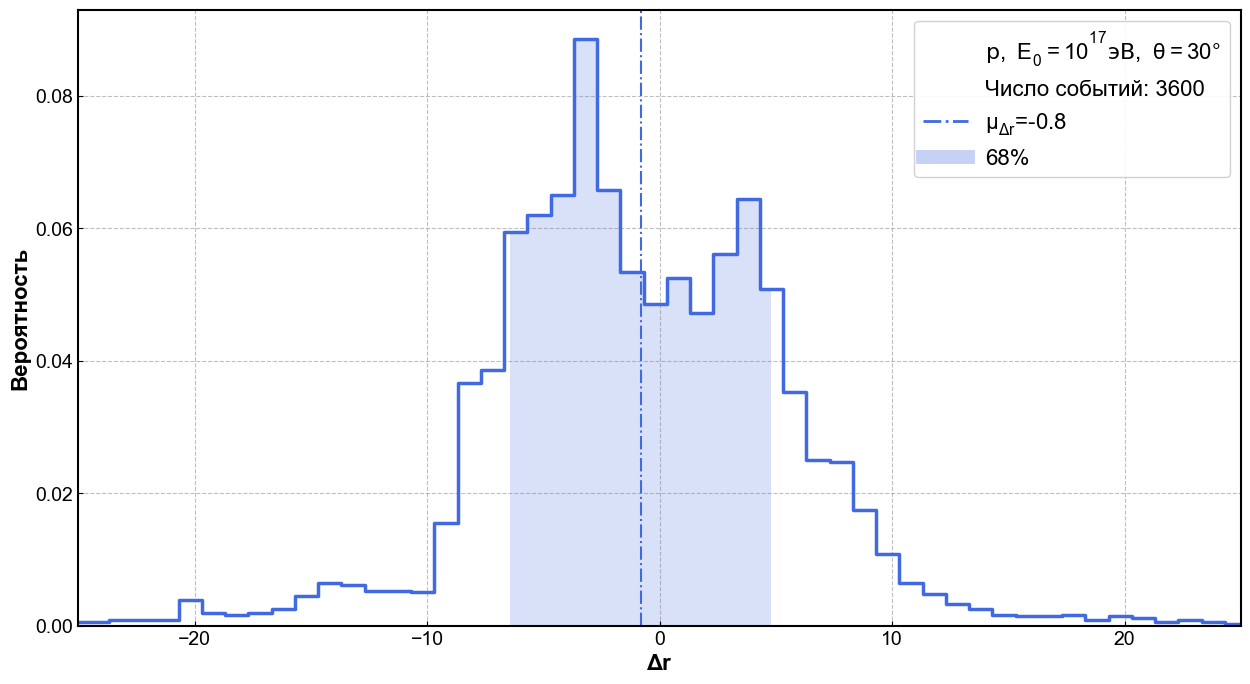

In [258]:
plot_single_distribution_by_name(arrays, who, E, limit, bin_width, save)

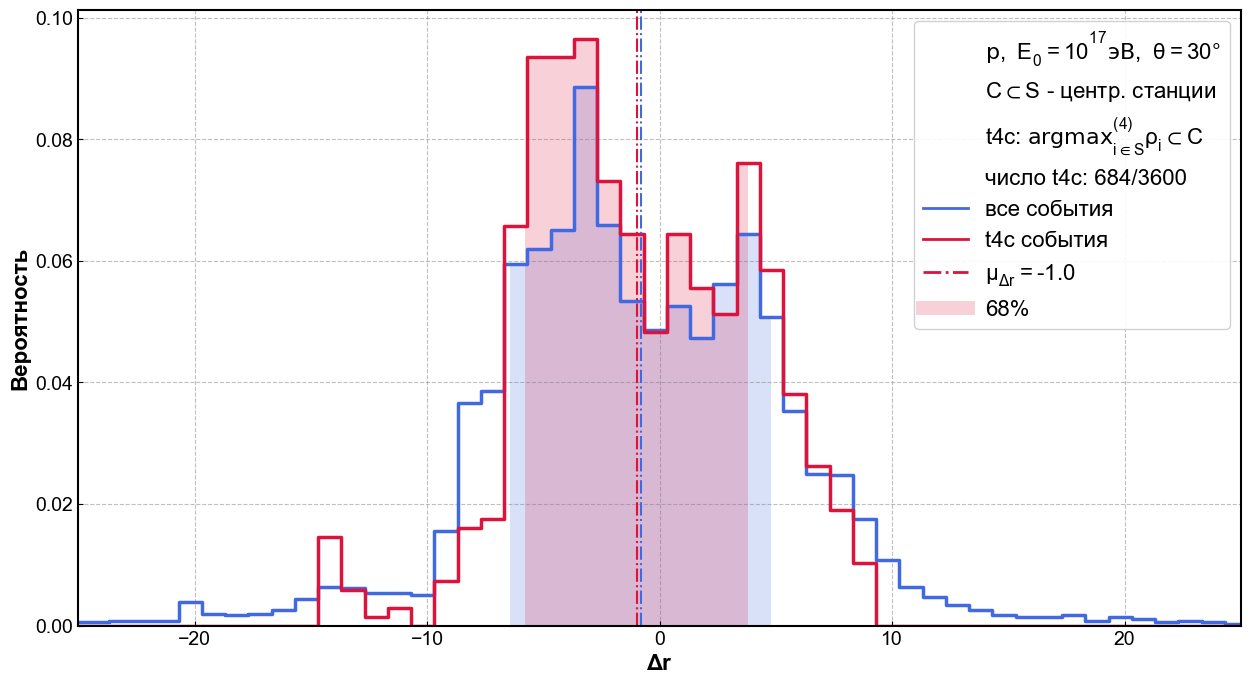

In [259]:
plot_two_distributions_by_name(arrays, who, E, limit, bin_width, save)

## $N_e$

In [254]:
limit = 0.8
bin_width = 0.05
save = False

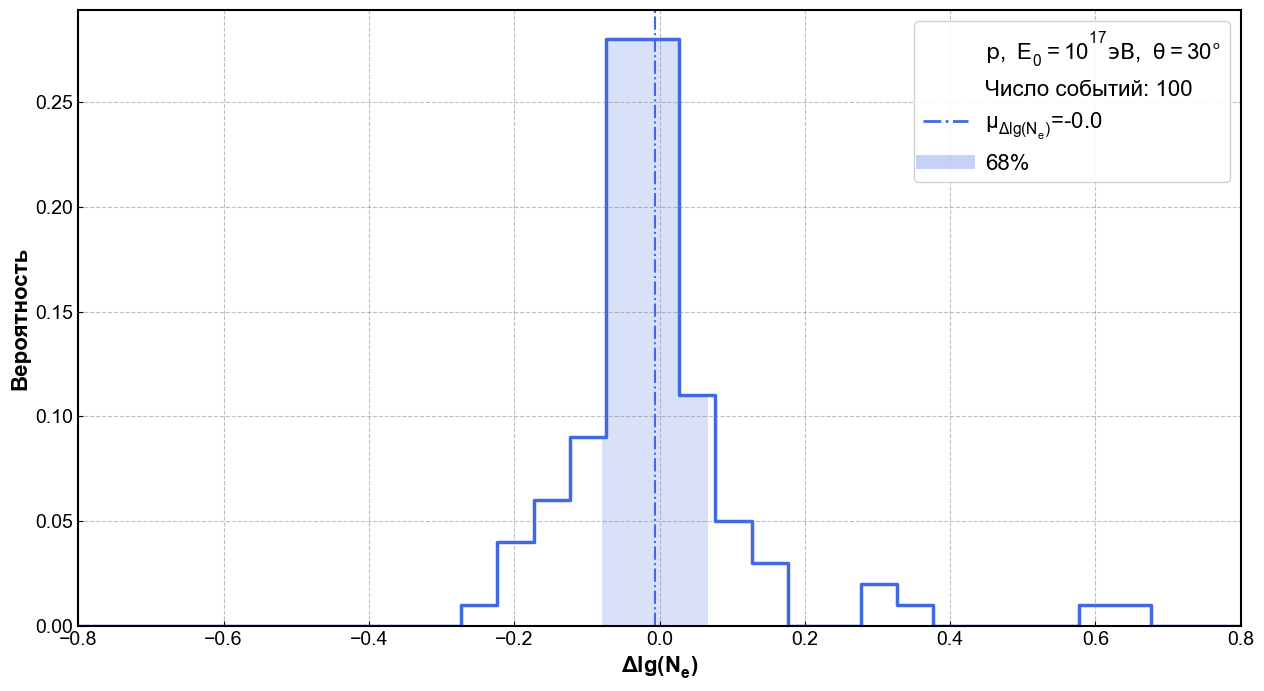

In [255]:
plot_single_distribution_Ne(Ne_opt, Ne, 'Ne', E, limit, bin_width, save)

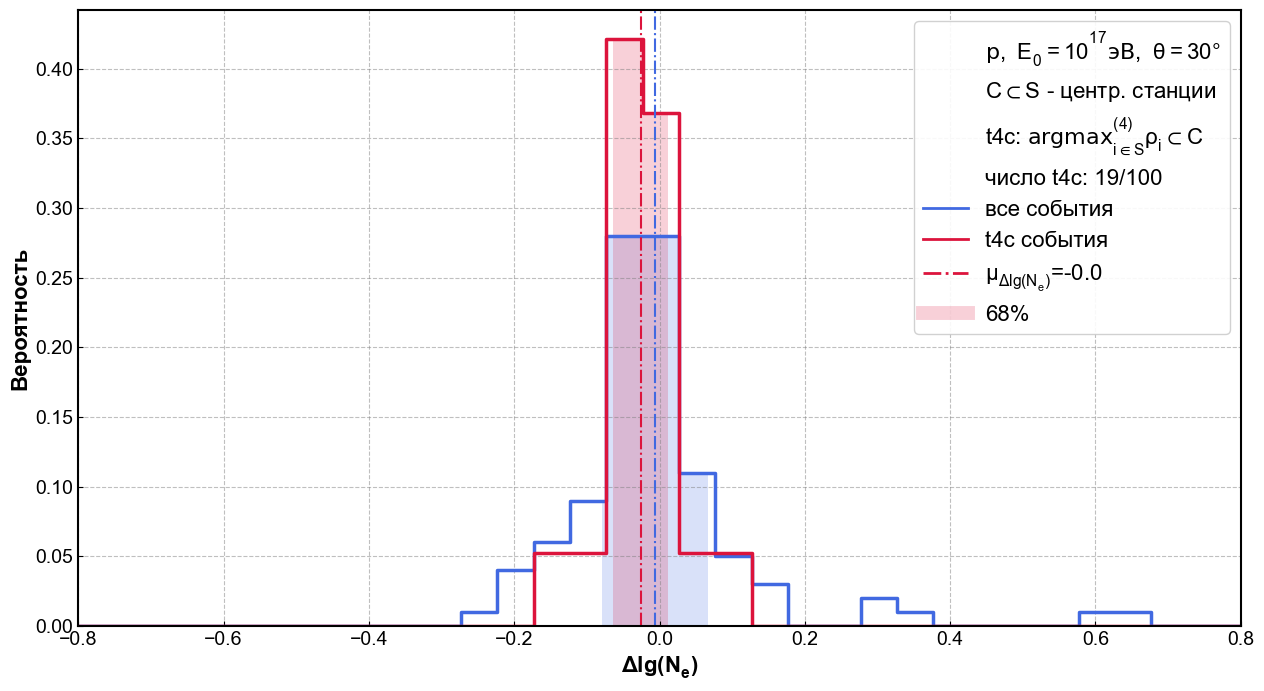

In [256]:
plot_two_distributions_Ne(Ne_opt, Ne, t4c_Ne_opt, t4c_Ne, 'Ne', E, limit, bin_width, save)

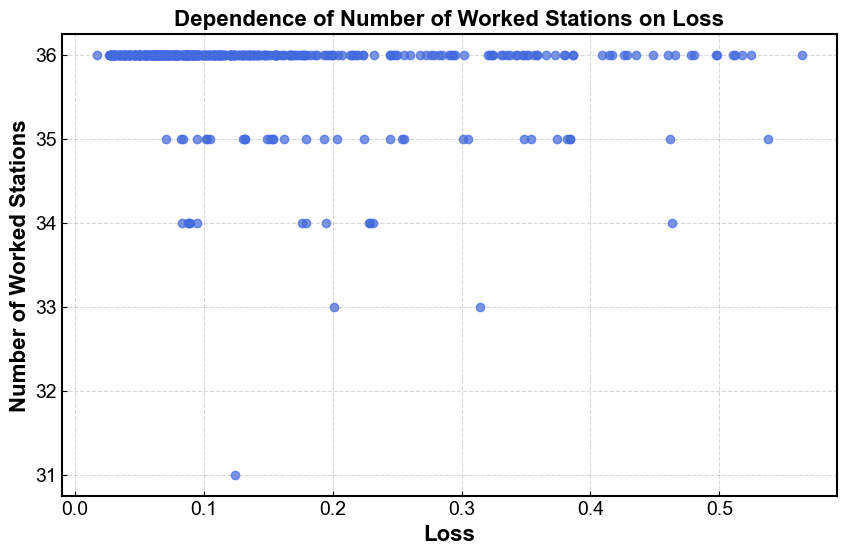

In [183]:
stations_count = np.array([len(stations) for stations in df['worked_stations']])

loss = np.array(df['loss'])
plt.figure(figsize=(10, 6))
plt.scatter(loss, stations_count, color='royalblue', alpha=0.7)
plt.xlabel('Loss')
plt.ylabel('Number of Worked Stations')
plt.title('Dependence of Number of Worked Stations on Loss')
plt.grid(True)
plt.show()